In [7]:
from utils import install_packages, interactive_pairplot

In [8]:
install_packages() # install required packages if necessary, might requires restarting the kernel/colab runtime

In [9]:
import jax
import jax.numpy as jnp
import os
jax.devices() # Should be cuda
_ = os.system("nvidia-smi  --query-gpu=name --format=csv,noheader") # Should show GPU info

NVIDIA GeForce RTX 3050 Laptop GPU


In [10]:
from scoresbibm.utils.data_utils import load_model

import matplotlib.pyplot as plt
import numpy as np

from sbi.analysis import pairplot


# Two Moons example 

This is a simple example of a two moons benchmark model. 

### 1) Loading model and sample

In [11]:
model = load_model("../results/example_guidance", 2)

In [12]:
condition_mask = jnp.array([False]*5 + [True]*8)
x_o = jnp.array([0.,-1.,-8.,0.,-3.,0.,-1.,-1.,-1])

In [13]:
# Models are convenience wrappers around functions to match the sbi API, they do not necessarily support full jit and might not be super efficient
@jax.jit
def sample_fn(rng, condition_mask, x_o):
  samples1 = model.sample(3000, condition_mask=condition_mask, x_o=x_o, rng=rng, num_steps=100, unique_nodes=True, return_conditioned_samples=True)
  return samples1


In [14]:
samples = sample_fn(jax.random.PRNGKey(2), condition_mask, x_o) # Compile time

In [15]:
%%timeit 
sample_fn(jax.random.PRNGKey(2), condition_mask, x_o)

1.98 s ± 2.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


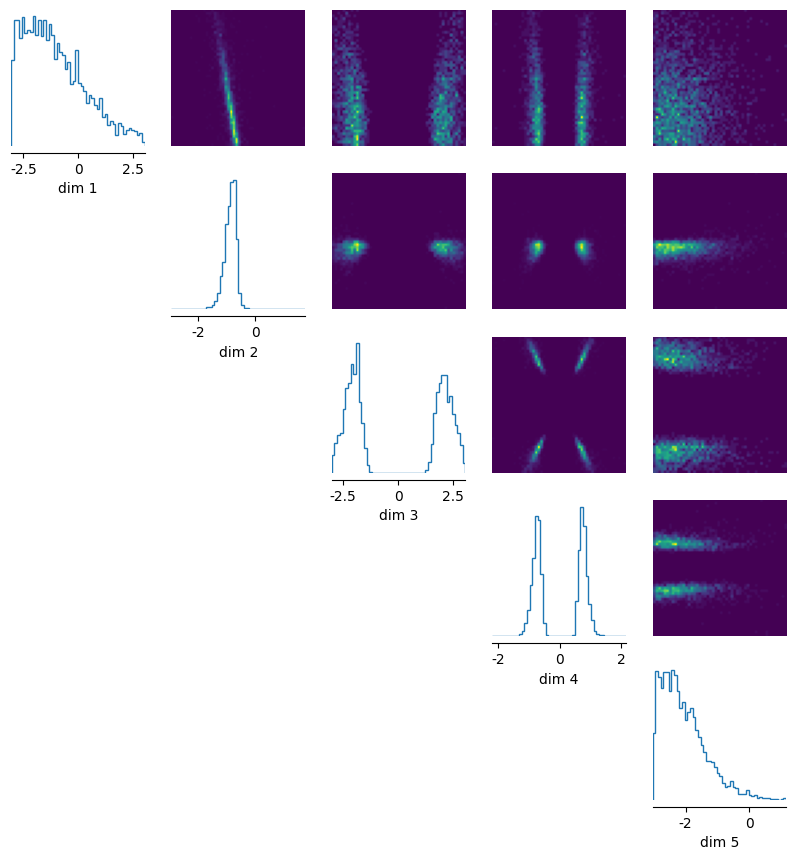

In [16]:
# Posterior samples
_ = pairplot(np.array(samples[:,~condition_mask]))

### 2) Interactive pairplot 

To explore different conditionals we provide an interactive pairplot. To condition on a variable, simply click with your mouse on any of the 1d marginal plots (diagonal) and the pairplot will update to show the conditional distribution (with the value equalling to the position you clicked on).

Wheras we only benchmark well-specifed cases in the main paper, here you can explore how the model behaves if you intentionally condition on impossible or just very unlikely combinations of variables !

In [17]:
lowers = np.array([-3.]*5 + [-15.]*8)
uppers = np.array([3.]*5 + [15.]*8)

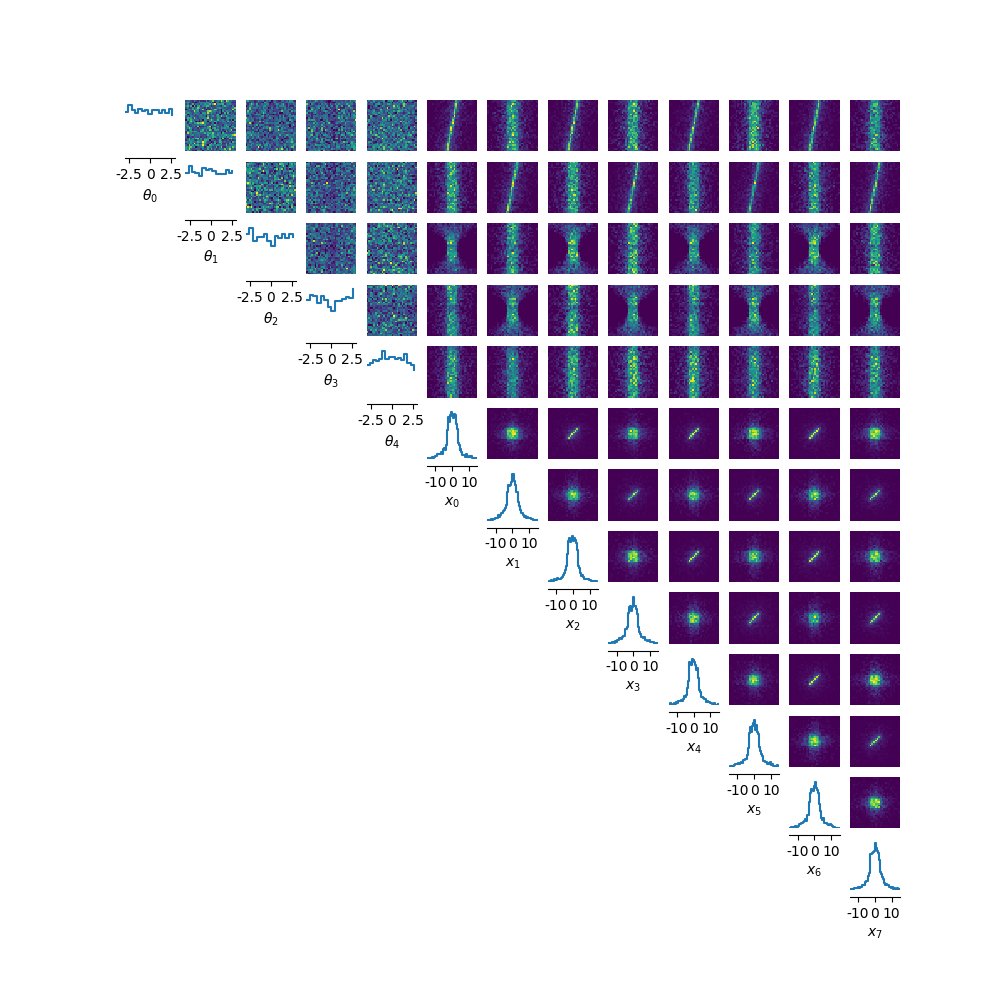

In [20]:
%matplotlib widget
fig, axes = interactive_pairplot(sample_fn, condition_mask, lowers, uppers,[rf"$\theta_{i}$" for i in range(5)] + [rf"$x_{i}$" for i in range(8)], figsize=(10,10), off_diag_bins=30)

In [19]:
plt.close() # Close the plot to avoid double plotting  